In [98]:
import pandas as pd

train_df = pd.read_csv('/home/rodion/labs/da_course/lab2/data/contest_train.csv')
train_df.drop('ID',axis=1,inplace=True)
# 1
print('train_df_shape = ',train_df.shape)
print(train_df.columns)

train_df_shape =  (9999, 102)
Index(['TARGET', 'FEATURE_0', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3',
       'FEATURE_4', 'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8',
       ...
       'FEATURE_91', 'FEATURE_92', 'FEATURE_93', 'FEATURE_94', 'FEATURE_95',
       'FEATURE_96', 'FEATURE_97', 'FEATURE_98', 'FEATURE_99', 'FEATURE_100'],
      dtype='object', length=102)


In [99]:
pct_null = (train_df.isnull().sum() / len(train_df)).sort_values(ascending=False)
missing_features = pct_null[pct_null > 0.08].index
train_df.drop(missing_features, axis=1, inplace=True)
# fill other data with knn imputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

imputer = KNNImputer(n_neighbors= 3)
train_df.iloc[:,1:] = imputer.fit_transform(train_df.iloc[:,1:])
robust_scaler = RobustScaler()
train_df.iloc[:,1:] = robust_scaler.fit_transform(train_df.iloc[:,1:])
df_class_0 = train_df[train_df["TARGET"] == 0]
df_class_1 = train_df[train_df["TARGET"] == 1]
df_class_2 = train_df[train_df["TARGET"] == 2]
df_class_1_over = df_class_1.sample(len(df_class_0), replace=True)
df_class_2_over = df_class_2.sample(len(df_class_0), replace=True)

train_df = pd.concat([df_class_0, df_class_1_over, df_class_2_over], axis=0)
train_df = train_df.sample(n = len(train_df))
print(train_df.shape)

(21279, 99)


In [100]:
train_df

,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,...,FEATURE_91,FEATURE_92,FEATURE_93,FEATURE_94,FEATURE_95,FEATURE_96,FEATURE_97,FEATURE_98,FEATURE_99,FEATURE_100
5253,0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,41.773742,-0.184985,...,15.103908,26.828572,7.375554,4.024949,0.310676,0.008460,0.749714,-0.497180,0.545383,-0.560590
4303,0,-0.2,-0.5,0.0,0.0,0.0,0.0,0.0,0.026396,-1.568934,...,-0.339717,-0.688422,-0.054820,-0.048736,-0.215852,0.580663,-0.070483,0.175598,-0.001815,-0.096824
4096,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.258179,1.326847,...,-0.273907,-0.240035,-0.112364,-0.502851,-0.434520,1.433222,0.924397,-0.494379,-0.411339,-0.226139
7064,0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.504408,6.275347,...,0.658968,0.007723,-0.156609,-0.137664,0.711228,0.822740,0.196050,-0.300343,0.434446,2.500540
3630,1,0.2,0.5,0.0,0.0,0.0,0.0,0.0,-0.680613,0.577449,...,-0.398938,-0.346172,0.114267,0.592409,-0.025116,0.691868,-0.278130,-0.138087,1.137848,0.867698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,1,-0.2,-0.5,0.0,0.0,0.0,0.0,0.0,-0.565301,-0.378999,...,-0.212955,-0.202567,0.083714,0.266422,-0.665961,-0.334170,0.409455,-0.345791,1.648258,-0.171241
9770,2,0.2,0.5,0.0,0.0,0.0,0.0,0.0,-1.368918,-0.421123,...,0.584288,-0.238237,-0.465929,-0.459554,-0.758067,0.209357,0.387897,-0.129420,0.286433,-0.270696
9604,1,0.6,1.0,1.0,0.0,1.0,0.0,0.0,10.184317,53.719428,...,-0.477234,0.143798,0.581519,0.700351,-0.196193,0.455301,0.553737,-0.147941,-0.475434,-0.811709
8933,0,0.4,0.5,0.0,0.0,0.0,0.0,0.0,0.281478,2.026470,...,3.355439,3.380689,1.770827,4.580840,-0.191598,-0.411567,-0.952792,0.588083,2.391171,-0.087166


In [101]:
Y_train=train_df.iloc[:,0]
X_train=train_df.iloc[:,1:]

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [1]:
import numpy as np 
import pandas as pd 
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torchvision
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
import torch.utils.data as data_utils
import tqdm
import torchvision.datasets as dataset
from torch.utils.data import Subset
import time

In [105]:
batch_size = 36
num_workers = 4

x_train = torch.tensor(x_train.values.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32))
x_valid = torch.tensor(x_valid.values.astype(np.float32))
y_valid = torch.tensor(y_valid.values.astype(np.float32))


trainset = data_utils.TensorDataset(x_train, y_train)
validset = data_utils.TensorDataset(x_valid, y_valid)

trainloader = DataLoader(trainset, batch_size=batch_size, pin_memory=True)
validloader = DataLoader(validset, batch_size=batch_size, pin_memory=True)
print(len(trainloader))
print(len(validloader))


473
119


In [106]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                                nn.Linear(x_train.shape[1], x_train.shape[1]//2),
                                nn.ReLU(),
                                nn.Dropout(p=0.2),
                                nn.Linear(x_train.shape[1]//2, x_train.shape[1]//4),
                                nn.ReLU(),
                                nn.Dropout(p=0.2), 
                                nn.Linear(x_train.shape[1]//4, 3))

    def forward(self, x):
        return self.model(x)

model = NeuralNet()

In [122]:
def train_model(model, train_loader, valid_loader, criterion, optimizer, sheduler, n_epochs):
    valid_loss_min = np.Inf
    patience = 20
    p = 0
    stop = False

    # количество эпох
    for epoch in range(1, n_epochs+1):
          b_i=0
          train_loss = []

          for batch_i, (data, target) in enumerate(train_loader):
              target = target.type(torch.LongTensor)
              b_i+=1
              optimizer.zero_grad()
              output = model(data)
              loss = criterion(output, target)
              train_loss.append(loss.item())
              loss.backward()
              optimizer.step()
      # запускаем валидацию
          model.eval()
          val_loss = []
          for batch_i, (data, target) in enumerate(valid_loader):
              target = target.type(torch.LongTensor)
              output = model(data)
              loss = criterion(output, target)
              val_loss.append(loss.item()) 

          print(f"Epoch {epoch}, train loss: {np.mean(train_loss):.4f}, valid loss: {np.mean(val_loss):.4f}, lr: {optimizer.param_groups[0]['lr']}")

          valid_loss = np.mean(val_loss)
          sheduler.step(valid_loss)
          if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f})'.format(
              valid_loss_min,
              valid_loss))
              
              valid_loss_min = valid_loss
              p = 0

          # проверяем как дела на валидации
          if valid_loss > valid_loss_min:
              p += 1
              
              print(f'{p} epochs of increasing val loss')
              if p > patience:
                  print('Stopping training')
                  stop = True
                  break        

          if stop:
              break
        
    return model, train_loss, val_loss

In [123]:
import torch

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9,nesterov=True)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=4, verbose=True)


In [124]:
model_out, train_loss, val_loss = train_model(model, trainloader, validloader, criterion, 
                              optimizer, scheduler, n_epochs=250)

Epoch 1, train loss: 0.6932, valid loss: 0.8231, lr: 0.01
Validation loss decreased (inf --> 0.823101)
Epoch 2, train loss: 0.6334, valid loss: 0.8231, lr: 0.01
1 epochs of increasing val loss
Epoch 3, train loss: 0.6055, valid loss: 0.7391, lr: 0.01
Validation loss decreased (0.823101 --> 0.739121)
Epoch 4, train loss: 0.5963, valid loss: 0.7585, lr: 0.01
1 epochs of increasing val loss
Epoch 5, train loss: 0.5853, valid loss: 0.7975, lr: 0.01
2 epochs of increasing val loss
Epoch 6, train loss: 0.5618, valid loss: 0.7584, lr: 0.01
3 epochs of increasing val loss
Epoch 7, train loss: 0.5568, valid loss: 0.7602, lr: 0.01
4 epochs of increasing val loss
Epoch 8, train loss: 0.5496, valid loss: 0.8126, lr: 0.01
Epoch     8: reducing learning rate of group 0 to 2.0000e-03.
5 epochs of increasing val loss
Epoch 9, train loss: 0.5153, valid loss: 0.7048, lr: 0.002
Validation loss decreased (0.739121 --> 0.704788)
Epoch 10, train loss: 0.4905, valid loss: 0.7003, lr: 0.002
Validation loss de

In [128]:
model.eval()

predicts = []
targets = []
with torch.no_grad():
  for data, target in validloader:
    
    outputs = model(data)
    _, predicted = torch.max(outputs.data, 1)
    predicted = predicted.cpu().numpy()
    target = target.cpu().numpy()
    for pred in predicted:
        predicts.append(pred)
    for t in target:
        targets.append(t)


In [132]:
from sklearn.metrics import f1_score

print("NN score = ",f1_score(targets, predicts, average='micro'))

NN score =  0.7077067669172933


Task2

In [149]:
import os ,fnmatch

def find_files(directory : str, pattern : str):
        for root, dirs, files in os.walk(directory):
            for basename in files:
                if fnmatch.fnmatch(basename, pattern):
                    filename = os.path.join(root, basename)
                    yield filename

images_list = list(find_files('task2', '*.jpeg'))
import random
random.shuffle(images_list)

In [157]:

import albumentations as A
from albumentations import pytorch as AT

data_transforms = A.Compose([
    A.Resize(256, 256),                         
    A.augmentations.transforms.HorizontalFlip(p=0.5),
    AT.ToTensor()
    ])

data_transforms_test = A.Compose([
    A.Resize(256, 256),
    AT.ToTensor()
    ])

class DatasetLoader(Dataset):
  def __init__(self,image_list,transform=None):
        self.image_list = image_list
        self.transform = transform

  def __len__(self):
        return len(self.image_list)

  def __getitem__(self, idx: int):       
        image_path = self.image_list[idx]
            
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = 0 if 'train_elephants' in image_path else 1
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image, label

In [158]:
batch_size = 12

train_list = images_list[:12000]
valid_list = images_list[12000:]

trainset = DatasetLoader(image_list=train_list, transform = data_transforms)
validset = DatasetLoader(valid_list, transform=data_transforms_test)

trainloader = DataLoader(trainset, pin_memory=True, 
                                        batch_size=batch_size)
validloader = DataLoader(validset, batch_size=batch_size, pin_memory=True)

print(len(trainloader),len(validloader))

1000 167


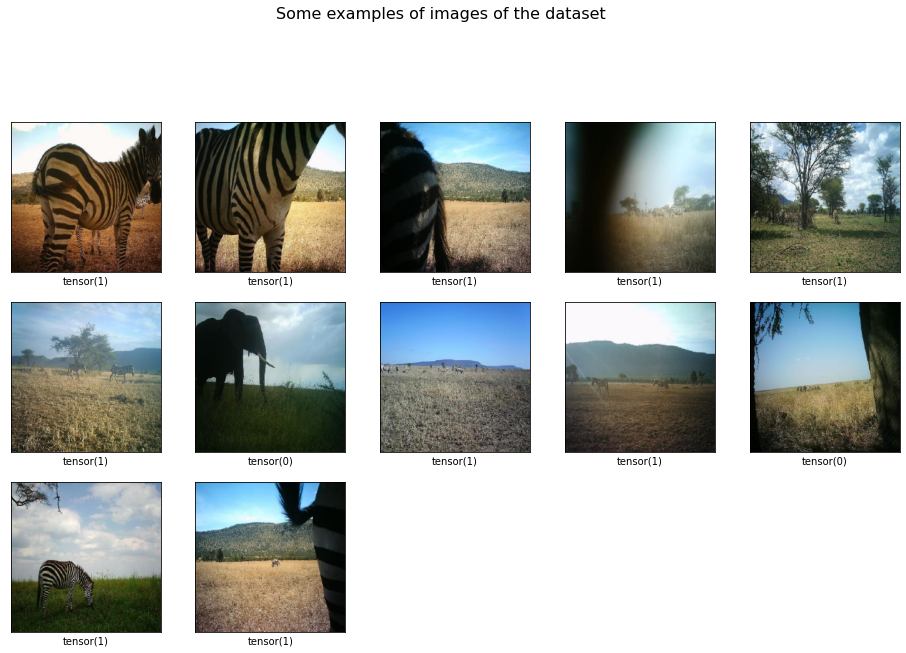

In [160]:
samples, labels = next(iter(trainloader))
fig = plt.figure(figsize=(16, 16))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(12):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.transpose(samples[i], (1, 2, 0)), cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

In [161]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [187]:
model = torchvision.models.resnet34(pretrained=True)
model.fc.out_features = 2

def train_model(model_conv, train_loader, valid_loader, criterion, optimizer, sheduler, n_epochs):
    model_conv.to(device)
    valid_loss_min = np.Inf
    patience = 10
    p = 0
    stop = False

    # количество эпох
    for epoch in range(1, n_epochs+1):
          print(time.ctime(), 'Epoch:', epoch)
          b_i=0
          train_loss = []

          for data, target in tqdm.tqdm(train_loader):
              b_i+=1
              data, target = data.to(device), target.to(device)
              optimizer.zero_grad()
              output = model_conv(data)
              loss = criterion(output, target)
              train_loss.append(loss.item())
              loss.backward()
              optimizer.step()
          model_conv.eval()
          val_loss = []
          for data, target in tqdm.tqdm(valid_loader):
              data, target = data.to(device), target.to(device)
              output = model_conv(data)
              loss = criterion(output, target)
              val_loss.append(loss.item()) 

          print(f"Epoch {epoch}, train loss: {np.mean(train_loss):.4f}, valid loss: {np.mean(val_loss):.4f}, lr: {optimizer.param_groups[0]['lr']}")

          valid_loss = np.mean(val_loss)
          sheduler.step(valid_loss)
          if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f})'.format(
              valid_loss_min,
              valid_loss))
              torch.save(model_conv.state_dict(), 'task2/best.pt')
              
              
              valid_loss_min = valid_loss
              p = 0

          if valid_loss > valid_loss_min:
              p += 1
              
              print(f'{p} epochs of increasing val loss')
              if p > patience:
                  print('Stopping training')
                  stop = True
                  break        

          if stop:
              break

        
    return model_conv, train_loss, val_loss

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/rodion/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:07<00:00, 11.6MB/s]


In [188]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=2, verbose=True)
model_resnet, train_loss, val_loss = train_model(model, trainloader, validloader, criterion, 
                              optimizer, scheduler, n_epochs=25)

Fri Dec 10 23:34:37 2021 Epoch: 1


100%|██████████| 167/167 [00:09<00:00, 17.24it/s]


Epoch 1, train loss: 0.2258, valid loss: 0.1097, lr: 0.0005
Validation loss decreased (inf --> 0.109683)
Fri Dec 10 23:36:18 2021 Epoch: 2


100%|██████████| 167/167 [00:09<00:00, 17.23it/s]


Epoch 2, train loss: 0.5249, valid loss: 0.3885, lr: 0.0005
1 epochs of increasing val loss
Fri Dec 10 23:37:57 2021 Epoch: 3


100%|██████████| 167/167 [00:09<00:00, 17.28it/s]


Epoch 3, train loss: 0.2986, valid loss: 0.2070, lr: 0.0005
2 epochs of increasing val loss
Fri Dec 10 23:39:36 2021 Epoch: 4


100%|██████████| 167/167 [00:09<00:00, 17.17it/s]


Epoch 4, train loss: 0.1833, valid loss: 0.1376, lr: 0.0005
Epoch     4: reducing learning rate of group 0 to 1.0000e-04.
3 epochs of increasing val loss
Fri Dec 10 23:41:15 2021 Epoch: 5


100%|██████████| 167/167 [00:09<00:00, 17.31it/s]


Epoch 5, train loss: 0.0716, valid loss: 0.0650, lr: 0.0001
Validation loss decreased (0.109683 --> 0.064998)
Fri Dec 10 23:42:55 2021 Epoch: 6


100%|██████████| 167/167 [00:08<00:00, 18.57it/s]


Epoch 6, train loss: 0.0463, valid loss: 0.0516, lr: 0.0001
Validation loss decreased (0.064998 --> 0.051614)
Fri Dec 10 23:44:32 2021 Epoch: 7


100%|██████████| 167/167 [00:09<00:00, 17.78it/s]


Epoch 7, train loss: 0.0329, valid loss: 0.0492, lr: 0.0001
Validation loss decreased (0.051614 --> 0.049185)
Fri Dec 10 23:46:01 2021 Epoch: 8


100%|██████████| 167/167 [00:09<00:00, 18.39it/s]


Epoch 8, train loss: 0.0280, valid loss: 0.0435, lr: 0.0001
Validation loss decreased (0.049185 --> 0.043486)
Fri Dec 10 23:47:30 2021 Epoch: 9


  5%|▌         | 51/1000 [00:04<01:21, 11.64it/s]


KeyboardInterrupt: 

In [191]:
model.load_state_dict(torch.load('task2/best.pt'))
model.to(device)
model.eval()
predicts = []
targets = []
with torch.no_grad():
  for data, target in validloader:
    data = data.to(device)
    outputs = model(data)
    _, predicted = torch.max(outputs.data, 1)
    predicted = predicted.cpu().detach().numpy()
    target = target.cpu().numpy()
    for pred in predicted:
        predicts.append(pred)
    for t in target:
        targets.append(t)

print("resnet score = ",f1_score(targets, predicts, average='micro'))

resnet score =  0.9854927463731866


Task 3

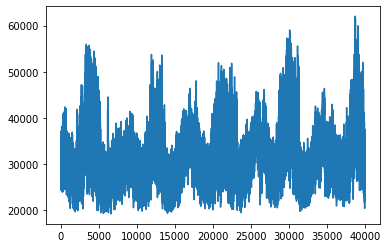

In [7]:
train_df = pd.read_csv('task3/PJME_hourly.csv')[:40000]

plt.plot(train_df['PJME_MW'])
plt.show()

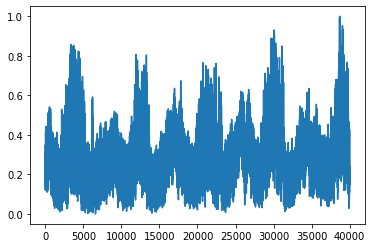

In [8]:
from sklearn.preprocessing import MinMaxScaler
import torch

scaler = MinMaxScaler()
train_df[['PJME_MW']] = scaler.fit_transform(train_df[['PJME_MW']])
train_df = train_df.drop('Datetime',axis=1)
plt.plot(train_df)
plt.show()

In [9]:
def create_sequences(input_data, tw):
    x = []
    y = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        x.append(train_seq)
        y.append(train_label)
    return x,y


seq_length = 32
x, y = create_sequences(train_df, seq_length)

train_size = int(len(y) * 0.7)
test_size = len(y) - train_size

dataX = torch.Tensor(np.array(x))
dataY = torch.Tensor(np.array(y))

trainX = torch.Tensor(np.array(x[0:train_size]))
trainY = torch.Tensor(np.array(y[0:train_size]))

testX = torch.Tensor(np.array(x[train_size:len(x)]))
testY = torch.Tensor(np.array(y[train_size:len(y)]))

In [14]:
class LSTM(nn.Module):
    
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        hiden_0 = torch.zeros(1, 1, model.hidden_layer_size).to(device)
        hiden_1 = torch.zeros(1, 1, model.hidden_layer_size).to(device)
        self.hidden_cell = (hiden_0,hiden_1)

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [18]:
model = LSTM()

model = model.to(device)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

epochs = 20
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=2, verbose=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for i in tqdm.tqdm(range(epochs)):
    loss = []
    for index, data in enumerate(trainX):
        target = trainY[index]
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        hiden_0 = torch.zeros(1, 1, model.hidden_layer_size).to(device)
        hiden_1 = torch.zeros(1, 1, model.hidden_layer_size).to(device)
        model.hidden_cell = (hiden_0,hiden_1)

        y_pred = model(data)

        single_loss = loss_function(y_pred, target)
        single_loss.backward()
        optimizer.step()
        loss.append(single_loss.item()) 
    mean_loss = np.mean(loss)
    scheduler.step(mean_loss)

    print(f'loss: {single_loss.item():10.8f}')
    torch.save(model.state_dict(), 'task3/best.pt')


  0%|          | 0/20 [00:00<?, ?it/s]/home/rodion/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  5%|▌         | 1/20 [00:47<15:05, 47.65s/it]

loss: 0.00064457


 10%|█         | 2/20 [01:35<14:18, 47.69s/it]

loss: 0.00045052


 15%|█▌        | 3/20 [02:20<13:11, 46.55s/it]

loss: 0.00010793


 20%|██        | 4/20 [03:05<12:13, 45.84s/it]

loss: 0.00005595


 25%|██▌       | 5/20 [03:49<11:19, 45.28s/it]

loss: 0.00005759


 30%|███       | 6/20 [04:33<10:28, 44.90s/it]

loss: 0.00007058


 35%|███▌      | 7/20 [05:17<09:39, 44.57s/it]

loss: 0.00007705


 40%|████      | 8/20 [06:02<08:54, 44.54s/it]

loss: 0.00006256


 45%|████▌     | 9/20 [06:46<08:09, 44.47s/it]

loss: 0.00005742


 50%|█████     | 10/20 [07:30<07:24, 44.46s/it]

loss: 0.00005148


 55%|█████▌    | 11/20 [08:15<06:39, 44.38s/it]

loss: 0.00003786


 60%|██████    | 12/20 [08:59<05:55, 44.42s/it]

loss: 0.00001453


 65%|██████▌   | 13/20 [09:43<05:09, 44.27s/it]

loss: 0.00000666


 70%|███████   | 14/20 [10:27<04:25, 44.19s/it]

loss: 0.00001296


 75%|███████▌  | 15/20 [11:11<03:40, 44.16s/it]

loss: 0.00001662


 80%|████████  | 16/20 [11:56<02:56, 44.23s/it]

loss: 0.00001123


 85%|████████▌ | 17/20 [12:39<02:12, 44.01s/it]

loss: 0.00000188


 90%|█████████ | 18/20 [13:23<01:28, 44.13s/it]

loss: 0.00000931


 95%|█████████▌| 19/20 [14:07<00:44, 44.10s/it]

loss: 0.00003312


100%|██████████| 20/20 [14:53<00:00, 44.67s/it]

loss: 0.00000787


In [24]:
predictions = []
gt = []
for index, data in enumerate(testX):
        target = testY[index]
        data, target = data.to(device), target.to(device)
        y_pred = model(data)
        predictions.append(y_pred.cpu().detach().numpy().squeeze())
        gt.append(target.cpu().detach().numpy().squeeze())
        

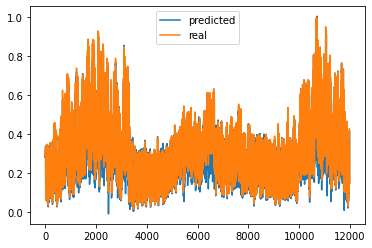

In [25]:
plt.plot(predictions, label = 'predicted')
plt.plot(gt, label = 'real')

plt.legend()